# 425 - ML Homework 6

## Problem 1

In [90]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import datetime
import io
import datetime
import matplotlib.lines as mlines
import statsmodels.formula.api as smf
import datetime

In [91]:
import warnings
warnings.filterwarnings('ignore')

In [92]:
#Lets generate a standard normal distribution of 1000000 random numbers
np.random.seed(0)
x = np.random.normal(0, 1, 1000000)

In [93]:
#our true generation functions is a sigmoid function
def sigmoid(x):
    return 1/(1+np.exp(-x))

In [94]:
y = sigmoid(x)

In [95]:
#Lets fit a neural network of 1 layer with 1 neuron to this data. We minimize the mean squared error using scipy.optimize.minimize
#The bias is 0
#Our neural network has one hidden layer and one output layer. The hidden layer has one neuron and the output layer has one neuron.
#The activation function is the sigmoid function for the hidden layer.
#The activation function is the identity function for the output layer.
#We define our neural network

from scipy.optimize import minimize

def neural_network(x, w):
    #x is a vector of inputs
    #w is a vector of weights
    #bias is 0
    #this function returns the output of the neural network
    w1 = w[0]
    w2 = w[1]
    return sigmoid(w1*x)*w2

#We define our mean squared error function
def mean_squared_error(w, x, y):
    #w is a vector of weights
    #x is a vector of inputs
    #y is a vector of observed outputs
    #this function returns the mean squared error
    return np.mean((neural_network(x, w) - y)**2)

#We define our initial weights
w0 = np.array([0.5, 0.1])

#We minimize the mean squared error
res = minimize(mean_squared_error, w0, args=(x, y))

#We print the results
print(res.x)
print("Both weights are close to 1. This is because the sigmoid function is the same as the true generation function.")


[0.99998182 0.99999973]
Both weights are close to 1. This is because the sigmoid function is the same as the true generation function.


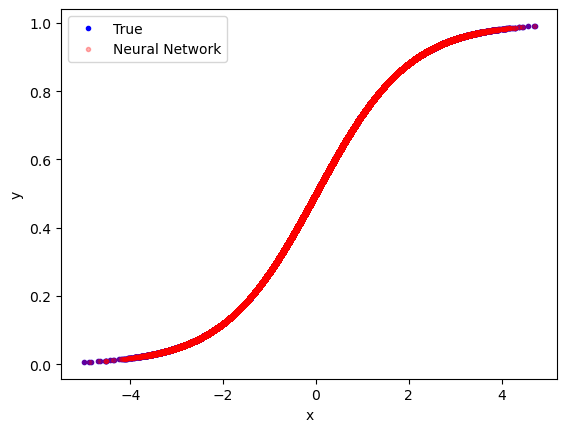

In [96]:
#We plot our neural network
plt.plot(x, y, 'b.', label = 'True')
plt.plot(x, neural_network(x, res.x), 'r.', label = 'Neural Network',alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [97]:
#we print the mean squared error
print("The mean squared error is", mean_squared_error(res.x, x, y).round(16))

mse1 = mean_squared_error(res.x, x, y)

The mean squared error is 8.1664e-12


### Lets add other layer

In [98]:
#We add other hidden layers and analize the difference with the mean squared error of the  previous model

#We define our neural network
def neural_network(x, w):
    #x is a vector of inputs
    #w is a vector of weights
    #bias is 0
    #this function returns the output of the neural network
    w1 = w[0]
    w2 = w[1]
    w3 = w[2]
    return sigmoid(sigmoid(w1*x)*w2)*w3

#We define our mean squared error function
def mean_squared_error_2(w, x, y):
    #w is a vector of weights
    #x is a vector of inputs
    #y is a vector of observed outputs
    #this function returns the mean squared error
    return np.mean((neural_network(x, w) - y)**2)


#We define our initial weights
w0 = np.array([0.5, 0.1, 0.4])

#We minimize the mean squared error
res = minimize(mean_squared_error_2, w0, args=(x, y))

#We print the results
print(res.x)

[5.59434753 3.46001322 0.67316047]


Weights are different from 1. The model is different from the real function.

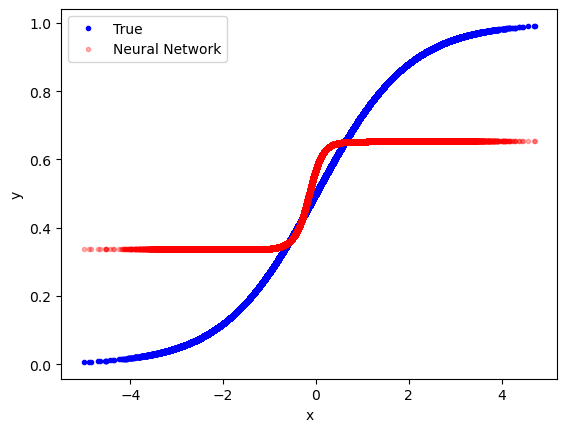

In [99]:
#We plot our neural network
plt.plot(x, y, 'b.', label = 'True')
plt.plot(x, neural_network(x, res.x), 'r.', label = 'Neural Network',alpha=0.3)
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()

In [100]:
#we print the mean squared error
print("The mean squared error is", mean_squared_error_2(res.x, x, y).round(16))
mse2 = mean_squared_error_2(res.x, x, y)

The mean squared error is 0.0100756459492839


In [101]:
#We compare the mean squared error of the two models
print("The mean squared error of the first model is", mse1.round(8))
print("The mean squared error of the second model is", mse2.round(8))
print("The model with the biggest mse is the second model. Our model with more hidden layers has a bigger mse than the model with one hidden layer.")

The mean squared error of the first model is 0.0
The mean squared error of the second model is 0.01007565
The model with the biggest mse is the second model. Our model with more hidden layers has a bigger mse than the model with one hidden layer.


In [102]:
print("The reason is that our first model already resembled the true generation process (the sigmoid function) very closely. Adding more hidden layers and neurons to our neural network only made distort our forecast model. The model with one hidden layer is the best model for this data.")

The reason is that our first model already resembled the true generation process (the sigmoid function) very closely. Adding more hidden layers and neurons to our neural network only made distort our forecast model. The model with one hidden layer is the best model for this data.


## Part 2

In [103]:
#Lets read card_transdata.csv 

df = pd.read_csv('card_transdata-1.csv')


In [104]:
#Lets select the first 500000 rows as training data, and the rest as test data
train = df[:500000]
test = df[500000:]

In [105]:
#Lets separa x_train, y_train, x_test, y_test
x_train = train.drop('fraud', axis=1)
y_train = train['fraud']
x_test = test.drop('fraud', axis=1)
y_test = test['fraud']

In [106]:
df

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1,1,0,0,0
1,10.829943,0.175592,1.294219,1,0,0,0,0
2,5.091079,0.805153,0.427715,1,0,0,1,0
3,2.247564,5.600044,0.362663,1,1,0,1,0
4,44.190936,0.566486,2.222767,1,1,0,1,0
...,...,...,...,...,...,...,...,...
999995,2.207101,0.112651,1.626798,1,1,0,0,0
999996,19.872726,2.683904,2.778303,1,1,0,0,0
999997,2.914857,1.472687,0.218075,1,1,0,1,0
999998,4.258729,0.242023,0.475822,1,0,0,1,0


In [107]:
import torch
from torch import nn
from torch.utils.data import DataLoader, TensorDataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import torch.optim as optim
torch.manual_seed(0)

In [108]:
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
if torch.cuda.is_available():
    torch.cuda.manual_seed_all(0)
device
torch.cuda.manual_seed_all(0)

In [109]:
training_data = TensorDataset(torch.tensor(x_train.values).float().to(device), torch.tensor(y_train.values).long().to(device))
#TensorDataset is a dataset wrapping tensors. Each sample will be retrieved by indexing tensors along the first dimension.
#Float() is used to convert the data type of the input to float

test_data = TensorDataset(torch.tensor(x_test.values).float().to(device), torch.tensor(y_test.values).long().to(device))
batch_size = 100 #depends of hardware
train_loader = DataLoader(training_data, batch_size=batch_size, shuffle=True)
#data loader combines the dataset and a sampler, and provides an iterable over the given dataset.
test_loader = DataLoader(test_data, batch_size=batch_size, shuffle=False)
#DataLoader combines a dataset and a sampler, and provides an iterable over the given dataset.

In [110]:

# Define the model
class NeuralNetwork(nn.Module):
    def __init__(self, input_size, hidden_size, output_size):
        #The __init__ method is called when the class is instantiated. It can be used to initialize the object's properties.
        #input_size is the number of neurons in the input layer
        #hidden_size is the number of neurons in the hidden layer
        #output_size is the number of neurons in the output layer
        super(NeuralNetwork, self).__init__() #super() function returns a temporary object of the superclass that allows access to all of its methods.
        #The __init__() method is called when the class is instantiated. It can be used to initialize the object's properties.
        self.flatten = nn.Flatten() #flatten is used to convert the tensor to a 1D tensor. Might not need it because we already have a 1D tensor
        self.linear_relu_stack = nn.Sequential(
            nn.Linear(input_size, hidden_size), #Applies a linear transformation to the incoming data: y = xA^T + b
            nn.ReLU(), #Applies the rectified linear unit function element-wise
            nn.Linear(hidden_size, hidden_size), #Applies a linear transformation to the incoming data: y = xA^T + b
            nn.ReLU(), #Applies the rectified linear unit function element-wise
            nn.Linear(hidden_size, output_size), #Applies a linear transformation to the incoming data: y = xA^T + b 
           # nn.Sigmoid() #Applies the sigmoid function element-wise
        )

    def forward(self, x):
        x = self.flatten(x)
        out = self.linear_relu_stack(x)
        return out

In [111]:
# Hyperparameters
input_size = 7 # Number of features
hidden_size = 128 # Number of neurons in the hidden layer
output_size = 10# Number of possible outcomes (fraud or not fraud)
learning_rate = 0.01 # Learning rate for the gradient descent algorithm
epochs = 5 #Performance vs time tradeoff

In [112]:
# Model, loss, and optimizer
model = NeuralNetwork(input_size, hidden_size, output_size).to(device)
loss_fn = nn.CrossEntropyLoss() #This criterion combines nn.LogSoftmax() and nn.NLLLoss() in one single class.
optimizer = optim.SGD(model.parameters(), lr=learning_rate)

In [113]:
#Training
#I need to correct the epoch part. it should be out of the for loop, overwhelming loop and training 
def train_loop(dataloader, model, loss_fn, optimizer):
    model.train() #Sets the module in training mode
    #The train_loop function is used to train the model
        #The train_loop function is used to train the model
    for batch, (X, y) in enumerate(dataloader):
            #Here we iterate over the batches of the dataset.
        pred = model(X) #The model makes a prediction
        #pred = sigmoid(pred)
        loss = loss_fn(pred, y) #The loss function calculates the loss

        optimizer.zero_grad() #The gradients are set to zero
        loss.backward() #The gradients are calculated
        optimizer.step() #The optimizer updates the model's parameters
        optimizer.zero_grad()

            #if batch % 100 == 0: #We print the loss every 100 batches
                #print(f"Epoch {epoch+1}, Batch {batch}, Loss: {loss.item()}")
            #print(f'Epoch [{epoch+1}/{num_epochs}], Step [{i+1}/{len(train_loader)}], Loss: {loss.item():.4f}')


In [114]:
from sklearn.metrics import f1_score, accuracy_score

def test_loop(dataloader, model, loss_fn):
    #The test_loop function is used to test the model
    model.eval() #The model is set to evaluation mode. This means that the model is not updated during the testing phase.
    test_loss, correct, predictions, labels = 0, 0, [], [] 
    #We initialize the test loss, the number of correct predictions, the predictions, and the labels

    with torch.no_grad(): #We do not need to calculate the gradients during the testing phase
        for X, y in dataloader: #We iterate over the batches of the dataset
            pred = model(X) #The model makes a prediction
            test_loss += loss_fn(pred, y).item() #The loss function calculates the loss. Is the total sum of the loss of the batches
            #squeeze() is used to remove the dimensions of size 1 from the shape of the tensor
            pred_labels = pred.squeeze()  # Assuming binary classification, we round the predictions to 0 or 1
            predictions.extend(pred_labels.tolist()) #We add the predictions to the list of predictions
            labels.extend(y.tolist()) #We add the labels to the list of labels
    predictions = np.argmax(predictions, axis=1) #We convert the predictions to a numpy array
    labels = np.array(labels) #We convert the labels to a numpy array
    f1 = f1_score(labels, predictions) #We calculate the F1 score
    accuracy = accuracy_score(labels, predictions) #We calculate the accuracy
    #print(f"Test Loss: {np.round(test_loss / len(dataloader),4)}, Accuracy: {np.round(accuracy*100,3)}%, F1 Score: {np.round(f1,3)}") #We print the test loss, the accuracy, and the F1 score
    #We divide the test loss by the number of batches to get the average test loss by batch
    return f1, accuracy, predictions, labels


In [115]:
#We now train the model
for epoch in range(epochs):
    train_loop(train_loader, model, loss_fn, optimizer)
    f1_1, acc, pred, lab = test_loop(test_loader, model, loss_fn)
    

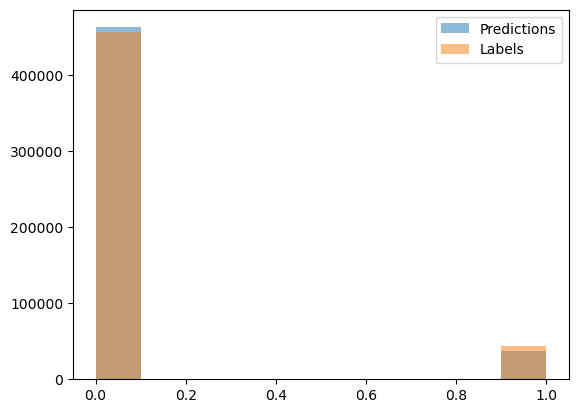

In [116]:
#We now test the model
plt.hist(pred, bins=10, alpha=0.5, label='Predictions')
plt.hist(lab, bins=10, alpha=0.5, label='Labels')
plt.legend()
plt.show()

In [117]:
#Now, we see the results for different number of neurons in the hidden layer
#I dont inted to do a deep neuron network, so I will test an aritmethic progression of neurons in the hidden layer
hidden_sizes = [1, 4, 16, 64, 128, 512]
results = []
for hidden_size_1 in hidden_sizes:
    model = NeuralNetwork(input_size, hidden_size_1, output_size).to(device)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    for epoch in range(epochs):
        train_loop(train_loader, model, loss_fn, optimizer)
        f1_1, acc, pred, lab = test_loop(test_loader, model, loss_fn)
    #We store the results in a dataframe for comparison
    results.append([hidden_size_1, f1_1, acc])
    print(f"Hidden Size: {hidden_size_1}, F1 Score: {f1_1}, Accuracy: {acc}")

Hidden Size: 1, F1 Score: 0.577488296988658, Accuracy: 0.89115
Hidden Size: 4, F1 Score: 0.735336271938127, Accuracy: 0.960852
Hidden Size: 16, F1 Score: 0.7856154910096819, Accuracy: 0.95691
Hidden Size: 64, F1 Score: 0.7881693849918636, Accuracy: 0.965894
Hidden Size: 128, F1 Score: 0.7899607671592416, Accuracy: 0.96927
Hidden Size: 512, F1 Score: 0.8385206717612727, Accuracy: 0.971558


Text(0.5, 1.0, 'F1 Score and Accuracy for Different Hidden Layer Sizes')

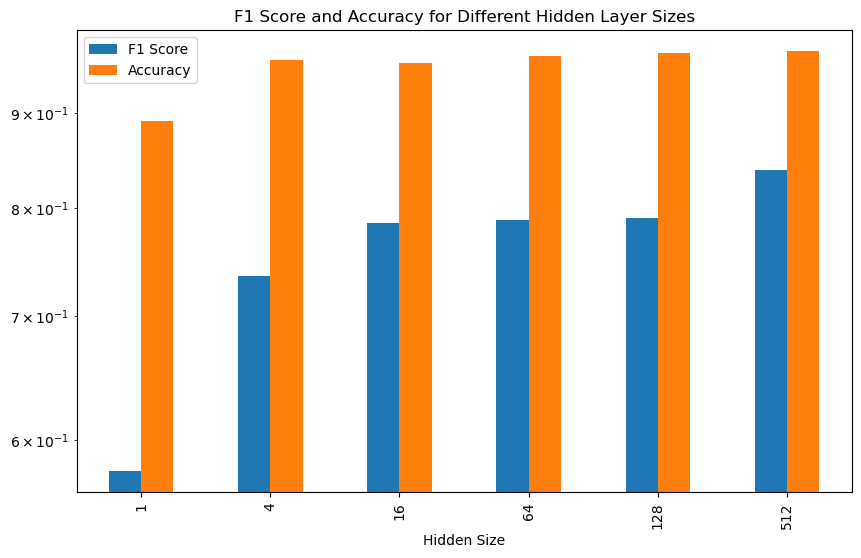

In [118]:
#We plot the results
results2 = pd.DataFrame(results, columns=['Hidden Size', 'F1 Score', 'Accuracy'])
results2 = results2.set_index('Hidden Size')
#For the plot, we change the scale to a logarithmic scale
results2.plot(kind='bar', figsize=(10, 6),logy=True)
plt.title('F1 Score and Accuracy for Different Hidden Layer Sizes')

Changing the number of neurons per layer (hidden_size) in the example code, alters the model's capacity to learn from data. **Increasing the number of neurons can enhance the model's ability to capture complex patterns**, potentially improving accuracy on complex datasets. <br>
However, **it also raises the risk of overfitting**, especially with limited data, and increases computational cost. Conversely, reducing the number of neurons might lead to underfitting, where the model cannot capture the underlying structure of the data. **Optimal neuron count often requires experimentation and validation.**

In [119]:
#We do the same testing for number of epochs
#hidden_size = 64 # Number of neurons in the hidden layer
epochs_1 = [1, 5, 10, 20, 30]
results = []
for num_epochs in epochs_1:
    model = NeuralNetwork(input_size, hidden_size, output_size).to(device)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    for epoch in range(epochs):
        train_loop(train_loader, model, loss_fn, optimizer)
        f1_1, acc, pred, lab = test_loop(test_loader, model, loss_fn)
    #We store the results in a dataframe for comparison
    results.append([num_epochs, f1_1, acc])
    print(f"Number of Epochs: {num_epochs}, F1 Score: {f1_1}, Accuracy: {acc}")

Number of Epochs: 1, F1 Score: 0.7549515206762244, Accuracy: 0.964516
Number of Epochs: 5, F1 Score: 0.8738503286364091, Accuracy: 0.977314
Number of Epochs: 10, F1 Score: 0.77773505095174, Accuracy: 0.967632
Number of Epochs: 20, F1 Score: 0.8357892732163688, Accuracy: 0.972408
Number of Epochs: 30, F1 Score: 0.8149033775617617, Accuracy: 0.971514


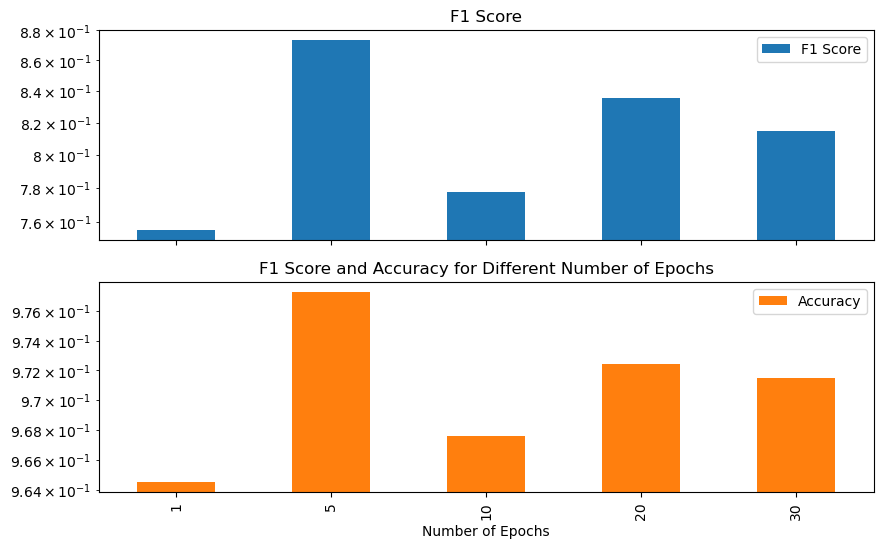

In [120]:
#We plot the results

results3 = pd.DataFrame(results, columns=['Number of Epochs', 'F1 Score', 'Accuracy'])
results3 = results3.set_index('Number of Epochs')
results3.plot(kind='bar', subplots=True,logy=True, figsize=(10, 6))
plt.title('F1 Score and Accuracy for Different Number of Epochs')
plt.show()

**Increasing the number of epochs means the neural network will go through the training data more times**, potentially improving model accuracy by better learning from the data. <br>
However, **too many epochs can lead to overfitting**, where the model learns noise in the training data, hurting its performance on new, unseen data. 

In [121]:
#We do the same testing for learning rate
#epochs = 50
learning_rates = [0.001, 0.01, 0.1, 0.5]
results = []
for learning_rate_1 in learning_rates:
    model = NeuralNetwork(input_size, hidden_size, output_size).to(device)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate_1)
    for epoch in range(epochs):
        train_loop(train_loader, model, loss_fn, optimizer)
        f1_1, acc, pred, lab = test_loop(test_loader, model, loss_fn)
    #We store the results in a dataframe for comparison
    results.append([learning_rate_1, f1_1, acc])
    print(f"Learning Rate: {learning_rate_1}, F1 Score: {f1_1}, Accuracy: {acc}")
    

Learning Rate: 0.001, F1 Score: 0.7022880032588771, Accuracy: 0.94738
Learning Rate: 0.01, F1 Score: 0.8170313701468805, Accuracy: 0.971922
Learning Rate: 0.1, F1 Score: 0.6809819477980913, Accuracy: 0.955608
Learning Rate: 0.5, F1 Score: 0.0, Accuracy: 0.912528


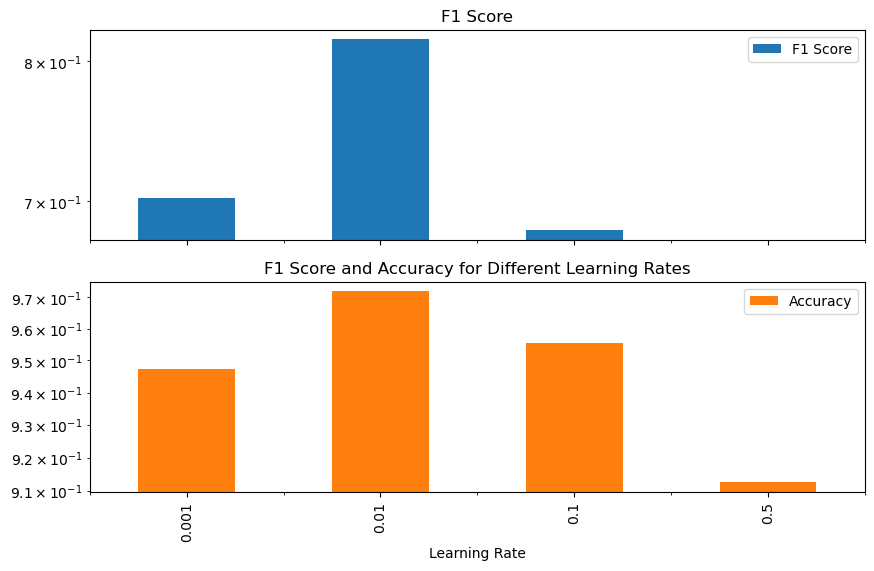

In [122]:
#We plot the results
results4 = pd.DataFrame(results, columns=['Learning Rate', 'F1 Score', 'Accuracy'])
results4 = results4.set_index('Learning Rate')
results4.plot(kind='bar', subplots=True,logy=True, figsize=(10, 6))
plt.title('F1 Score and Accuracy for Different Learning Rates')
plt.show()

**Increasing the learning rate speeds up the adjustments made to the model's weights during training**, which can lead to faster convergence. <br>
However, **if the learning rate is too high, the model may overshoot the optimal solution**, causing the training process to become unstable and potentially diverge, leading to worse performance. 

In [123]:
#We do the same testing for batch size
batch_sizes = [16, 32, 64, 128, 256]
results = []
for batch_size_1 in batch_sizes:
    train_loader = DataLoader(training_data, batch_size=batch_size_1, shuffle=True)
    test_loader = DataLoader(test_data, batch_size=batch_size_1, shuffle=False)
    model = NeuralNetwork(input_size, hidden_size, output_size).to(device)
    optimizer = optim.SGD(model.parameters(), lr=learning_rate)
    for epoch in range(epochs):
        train_loop(train_loader, model, loss_fn, optimizer)
        f1_1, acc, pred, lab = test_loop(test_loader, model, loss_fn)
    #We store the results in a dataframe for comparison
    results.append([batch_size_1, f1_1, acc])
    print(f"Batch Size: {batch_size_1}, F1 Score: {f1_1}, Accuracy: {acc}")

Batch Size: 16, F1 Score: 0.8692224672704237, Accuracy: 0.977704
Batch Size: 32, F1 Score: 0.8454861551737266, Accuracy: 0.975648
Batch Size: 64, F1 Score: 0.7115837157312626, Accuracy: 0.96078
Batch Size: 128, F1 Score: 0.8272010762650557, Accuracy: 0.97277
Batch Size: 256, F1 Score: 0.7024690308132778, Accuracy: 0.958016


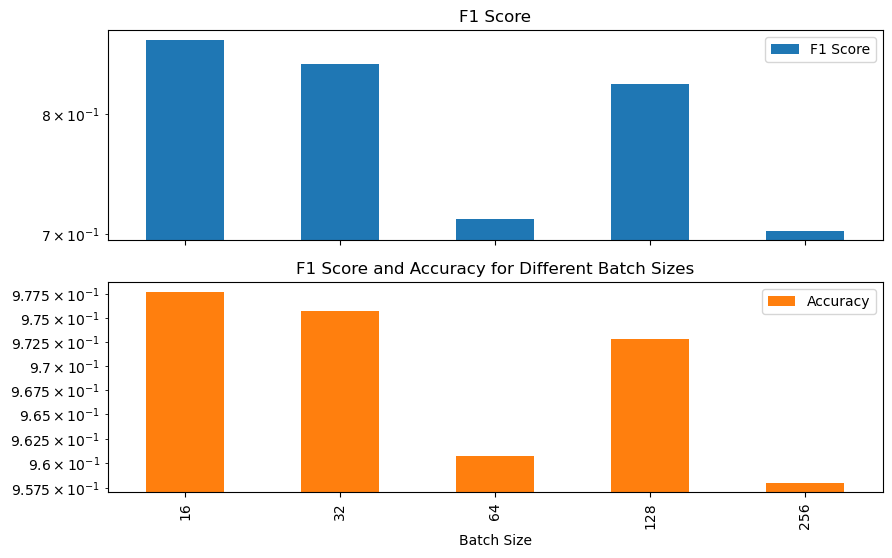

In [124]:
#We plot the results
results5 = pd.DataFrame(results, columns=['Batch Size', 'F1 Score', 'Accuracy'])
results5 = results5.set_index('Batch Size')
results5.plot(kind='bar', subplots=True,logy=True, figsize=(10, 6))
plt.title('F1 Score and Accuracy for Different Batch Sizes')
plt.show()

Batch size refers to the number of training samples used in one iteration of model training. It determines how many samples the network sees before updating its weights. <br>
**Smaller batch sizes can lead to faster convergence but with more noise in each update**, potentially improving generalization. **Larger batch sizes provide smoother gradient estimations**, which can speed up training but require more memory **and may result in less effective training outcomes due to fewer updates**.

## Choosing the optimal model

Optimizing model parameters involves balancing training accuracy against the risk of overfitting, while also considering computational resources and time. It's a strategic process of finding the right mix that yields a well-generalized model without excessive resource expenditure. <br>
In this homework, I present a preliminary analysis of how different parameters influence the model's performance. For a more advanced application, a comprehensive parameter tuning would be conducted to find the optimal combination that minimizes the loss function, aiming for the best possible model outcome. For now, i will use the best parameters obtained on this brief analysis.

In [127]:
batch_size = 100
epochs = 5
learning_rate = 0.01
hidden_size = 128
print(f'Best params: lr={learning_rate}, hs={hidden_size}, bs={batch_size}, ep={epochs}')


Best params: lr=0.01, hs=128, bs=100, ep=5


In [128]:
for epoch in range(epochs):
    train_loop(train_loader, model, loss_fn, optimizer)
    f1_1, acc, pred, lab = test_loop(test_loader, model, loss_fn)
    
print(f'Best params F1 Score: {f1_1}, Accuracy: {acc}')

Best params F1 Score: 0.8695744857234217, Accuracy: 0.977974


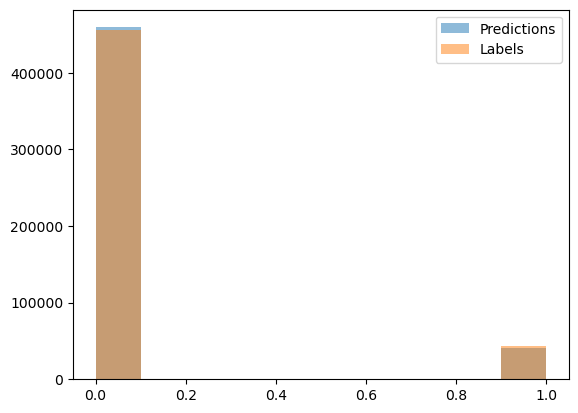

In [129]:
#We now test the model
plt.hist(pred, bins=10, alpha=0.5, label='Predictions')
plt.hist(lab, bins=10, alpha=0.5, label='Labels')
plt.legend()
plt.show()

In conclusion, while neural network models may require time to converge, their versatility allows for modeling both linear and non-linear relationships, potentially fitting nearly any type of data given enough tuning and time. <br>
For now, we cannot achieve the same good results as gomework 5, so **our model perform better with a simple decision tree**. Despite achieving high accuracy and F1 scores of around 0.99 in homework 5, suggesting little room for improvement, it's plausible that with further refinement and computational effort, neural networks could surpass these results, highlighting their potential for even greater performance.